# Assignment 1

**Name:** Doruk Kilitçioğlu  
**Student ID:** 2012400183

## 1. Uniform samples from a circular region

Uniform sampling from a circular region is relatively straightforward.

$\Theta \sim \mathcal{U}(0,2\pi)$ is simply a uniform random $x \sim \mathcal{U}(0,1)$ multiplied by 2$\pi$

As per the inversion method, we find the cumulative probability distribution $F_R(r)$ of *R* by integrating it from 0 to *r*, the result of which is $F_R(r)=r^2$.  
Let $m = F_R(r)$ and solve for *r*, we get $r=m^{1/2}$.

By choosing $m \sim \mathcal{U}(0,1)$ and evaluating *r*, we get the polar coordinates of a uniform random sample.  
The polar coordinates are then translated to *x* and *y* as:  
$$x = r cos(\theta) \\
y = r sin(\theta)$$

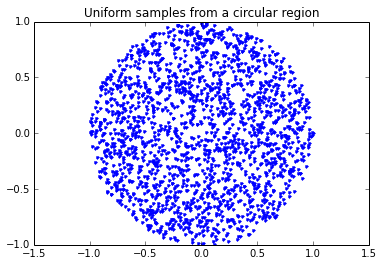

In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 2000

theta = np.random.rand(N)*2*np.pi
r = np.power(np.random.rand(N),0.5)
x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x,y,'.')
plt.axis('equal')
plt.title('Uniform samples from a circular region')
plt.show()

## 2. Sampling from p-norm using rejection sampling

### 2.1. Setting Up

Any of the previously generated samples can be checked for their p-norm acceptance by their *x* and *y* coordinates, using the formula given in the assignment description.

By looping over the previously generated samples, we can get the samples that are accepted according to the specific *p* we use. The efficiency is simply:

$$\frac{number\ of\ accepted\ samples}{total\ samples}$$

In [133]:
def is_accepted(x, y, p):
    return np.power(np.absolute(x),p)+np.power(np.absolute(y),p) <= 1;

### 2.2. *p* = 1.5 case

Use the generated functions with *p* = 1.5.

Efficiency of the proposal: 0.879


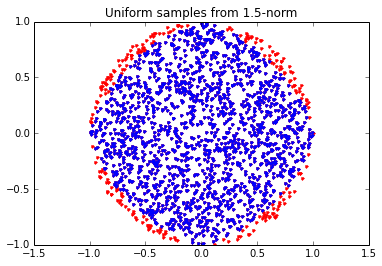

In [134]:
accepted = is_accepted(x, y, 1.5)
x1 = x[accepted]
y1 = y[accepted]

print('Efficiency of the proposal:',len(x1)/N)
plt.plot(x,y,'r.')
plt.plot(x1,y1,'.')
plt.axis('equal')
plt.title('Uniform samples from 1.5-norm')
plt.show()

### 2.3. *p* = 0.7 case

Use the generated functions with *p* = 0.7. Note the lower efficiency compared to *p* = 1.5 case.

Efficiency of the proposal: 0.4015


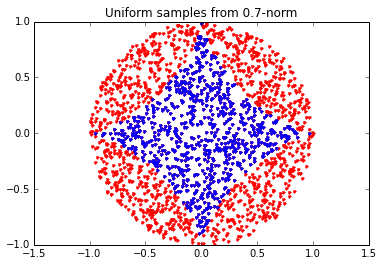

In [135]:
accepted = is_accepted(x, y, 0.7)
x2 = x[accepted]
y2 = y[accepted]

print('Efficiency of the proposal:',len(x2)/N)
plt.plot(x,y,'r.')
plt.plot(x2,y2,'b.')
plt.axis('equal')
plt.title('Uniform samples from 0.7-norm')
plt.show()

### 2.4. *p* = 0.7 case with a different proposal

Since the p-norm unit circles are superellipticals that grow outward from their center as *p* increases ([source](https://en.wikipedia.org/wiki/Norm_%28mathematics%29#Properties)), we can see that any uniformly random generated samples from a *k*-norm will lie in the area covered by the *t*-norm if $t\ge k$. 

Hence, we can use the *1*-norm as our proposal for rejection sampling on the *0.7*-norm. The *1*-norm is a special case where uniform samples can be generated with 100% efficiency since its shape is a unit square rotated $\pm \frac{\pi}{4}$ degrees, enlarged by $\sqrt{2}$, and centered at (0,0). By uniform sampling from the unit square and transforming the samples, we get uniform samples from the *1*-norm.

Efficiency of the new proposal: 0.62


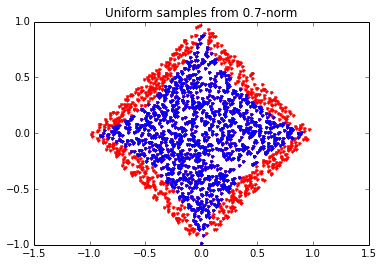

In [136]:
def sample_1_norm(N):
    x = (np.random.rand(N) - 0.5) * 2/np.sqrt(2)
    y = (np.random.rand(N) - 0.5) * 2/np.sqrt(2)

    r = np.power(np.power(x,2)+np.power(y,2),0.5)
    theta = np.arctan2(y, x) + np.pi / 4
    
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    
    return x, y

xs, ys = sample_1_norm(N)

accepted = is_accepted(xs, ys, 0.7)
x2 = xs[accepted]
y2 = ys[accepted]

print('Efficiency of the new proposal:',len(x2)/len(xs))
plt.plot(xs, ys, 'r.')
plt.plot(x2, y2, 'b.')
plt.axis('equal')
plt.title('Uniform samples from 0.7-norm')
plt.show()

We can see that the efficiency has increased, albeit not much. Choosing a *p* as close to *0.7* as possible would give us a higher efficiency, but obviously, the task of generating uniform samples from the proposal in the first place would get proportionally inefficient.

## 3. Bonus

### 3.1. Uniform random sample generation from the unit n-ball

Using multivariate normal sampling with zero mean and a unit covariance matrix, we can sample uniformly from the surface of the n-ball (the (n-1)-sphere) if we normalize our samples ([source](https://en.wikipedia.org/wiki/N-sphere#Uniformly_at_random_from_the_.28n.C2.A0.E2.88.92.C2.A01.29-sphere)).

From there, we also sample a random *r* radius using inversion sampling akin to the first part. We again introduce a bias for selecting a larger *r* for the sake of uniformity. This is defined by $r=m^{1/n}$ where *n* is the number of dimensions and $m \sim \mathcal{U}(0,1)$ ([source](https://en.wikipedia.org/wiki/N-sphere#Uniformly_at_random_from_the_n-ball)).

In [137]:
def random_r(dim, N):
    return np.power(np.random.rand(N),1/dim)

def normalize(vec):
    total = np.sum(np.power(vec,2), axis = 1, keepdims = True)
    return vec / np.power(total,0.5)

def random_nball_samples(dim, N):
    cov = np.zeros((dim,dim))
    np.fill_diagonal(cov, 1)
    r = random_r(dim, N)
    
    dirs = np.random.multivariate_normal(np.zeros(dim), cov, N)
    dirs = normalize(dirs) * r[:,None]
    
    return dirs.T

Trying the functions with 2 dimensions, we can see the uniformity of the random samples across the *2*-ball.

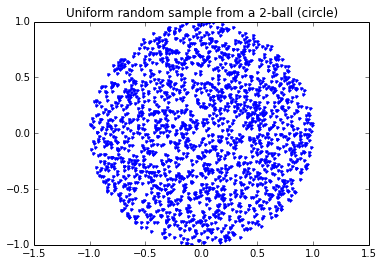

In [138]:
x, y = random_nball_samples(2, N)
plt.plot(x,y,'.')
plt.axis('equal')
plt.title('Uniform random sample from a 2-ball (circle)')
plt.show()

We can also try it with 3 dimensions and sketch a 3D plot. Sample size is reduced for better visibility.

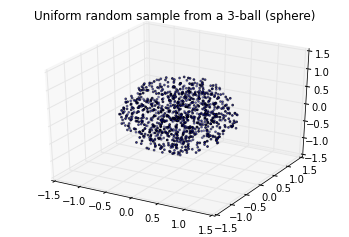

In [130]:
import matplotlib.pyplot as pyplt
from mpl_toolkits.mplot3d import Axes3D

N = 1000
x, y, z = random_nball_samples(3,N)
fig = pyplt.figure(figsize=)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, zdir='z', s=3, c='b')
pyplt.title('Uniform random sample from a 3-ball (sphere)')
pyplt.show()

### 3.2. n-cube proposals for rejection sampling from n-sphere

For large enough *N* (number of samples), the acceptance rate of sampling tends to the actual probability of a uniform random sample taken from the bounding n-cube of the unit n-sphere being inside the unit n-sphere.  
This probability can be defined as  

$$\frac{volume\ of\ n-sphere}{volume\ of\ n-cube}$$

where the volume of the n-sphere with low dimensions [can be calculated recursively](https://en.wikipedia.org/wiki/Volume_of_an_n-ball#Low_dimensions) and the volume of the bounding n-cube of the unit n-sphere is $2^n$.

In [291]:
def volume_nball(r, n):
    factor = 1
    start = n % 2
    
    if(start == 1):
        factor *=2
        start = 3
    else:
        start = 2
        
    for i in range(start, n+2, 2):
        factor *= ((2*np.pi)/i)
        
    return factor * np.power(r, n)

def volume_hypercube(r, n):
    return np.power(r, n)

r = 2

for n in range(1,11):
    print('Acceptance rate at n =',n,':',volume_nball(r,n)/volume_hypercube(2*r,n))
    

Acceptance rate at n = 1 : 1.0
Acceptance rate at n = 2 : 0.785398163397
Acceptance rate at n = 3 : 0.523598775598
Acceptance rate at n = 4 : 0.308425137534
Acceptance rate at n = 5 : 0.164493406685
Acceptance rate at n = 6 : 0.0807455121883
Acceptance rate at n = 7 : 0.0369122341432
Acceptance rate at n = 8 : 0.0158543442438
Acceptance rate at n = 9 : 0.00644240020066
Acceptance rate at n = 10 : 0.00249039457019


As the tests suggest, the acceptance rate rapidly decays for even a small number of dimensions, with *n* = 10 being already below 0.25%.